<a href="https://colab.research.google.com/github/OsmarHofman/African-Crisis-Data-Mining/blob/master/Pre_Processamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
url = 'https://raw.githubusercontent.com/OsmarHofman/African-Crisis-Data-Mining/master/african_crises.csv?token=AKECPJHSFJDJ77WCEIYKBNC53ZSJ2'
df = pd.read_csv(url,header=0, sep=',')
df

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


# Pré-Processamento:
&nbsp; Antes de qualquer tipo de transformação nos dados, serão removidas os atributos `case` e `cc3`, já que representam atributos que não serão úteis para os demais processos da mineração de dados.

In [0]:
df.drop(columns=['case','cc3'])

,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...
1054,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


## **Limpeza de dados** 

&nbsp; Primeiramente, será trocado os nomes do atributos, visto que alguns estão nominados como "crisis" e outros como "crises", assim unificando para "crisis". Assim como, padronizar o sufixo "in_default" para "default".


In [0]:
df.rename(columns={'domestic_debt_in_default' :'domestic_debt_default','inflation_crises' : 'inflation_crisis','currency_crises' : 'currency_crisis' },inplace =True)
df

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crisis,inflation_crisis,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


&nbsp; Sobre o atributo `currency_crisis`, seus valores deveriam ser somente 0 e 1, porém há algumas instâncias como 2, o qual serão retirados do conjunto.

In [0]:
from collections import Counter
Counter(df['currency_crisis'])

Counter({0: 923, 1: 132, 2: 4})

In [0]:
df = df[df.currency_crisis != 2]
df

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crisis,inflation_crisis,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


---
## **Transformação de Dados**

---
## *Discretização de dados numéricos*:
&nbsp; A discretização utilização será de mapeamento direto, nos atributos que apresentam 0 e 1, para representar false e true, respectivamente. Nos quais, os atributos são: `domestic_debt_in_default`, `sovereign_external_debt_default`, `independence`, `currency_crises`,`inflation_crises` e `systemic_crisis`.

In [0]:
to_replace = {
    0 : 'false',
    1 : 'true',
}
 
cols = ['domestic_debt_default','sovereign_external_debt_default', 'independence','systemic_crisis','inflation_crisis']
df[cols] = df[cols].replace(to_replace = to_replace) 
df

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crisis,inflation_crisis,banking_crisis
0,1,DZA,Algeria,1870,true,0.052264,false,false,0.0,3.441456,false,0,false,crisis
1,1,DZA,Algeria,1871,false,0.052798,false,false,0.0,14.149140,false,0,false,no_crisis
2,1,DZA,Algeria,1872,false,0.052274,false,false,0.0,-3.718593,false,0,false,no_crisis
3,1,DZA,Algeria,1873,false,0.051680,false,false,0.0,11.203897,false,0,false,no_crisis
4,1,DZA,Algeria,1874,false,0.051308,false,false,0.0,-3.848561,false,0,false,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,true,354.800000,true,true,0.0,-7.670000,true,1,false,crisis
1055,70,ZWE,Zimbabwe,2010,false,378.200000,true,true,0.0,3.217000,true,0,false,no_crisis
1056,70,ZWE,Zimbabwe,2011,false,361.900000,true,true,0.0,4.920000,true,0,false,no_crisis
1057,70,ZWE,Zimbabwe,2012,false,361.900000,true,true,0.0,3.720000,true,0,false,no_crisis


&nbsp; Assim, para padronizar, também troca-se os valores do atributo `banking_crisis` para true e false.

In [0]:
to_replace = {
    'no_crisis' : 'false',
    'crisis' : 'true',
}
df['banking_crisis'] = df.banking_crisis.replace(to_replace = to_replace) 
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crisis,inflation_crisis,banking_crisis
0,1,DZA,Algeria,1870,true,0.052264,false,false,0.0,3.441456,false,0,false,true
1,1,DZA,Algeria,1871,false,0.052798,false,false,0.0,14.149140,false,0,false,false
2,1,DZA,Algeria,1872,false,0.052274,false,false,0.0,-3.718593,false,0,false,false
3,1,DZA,Algeria,1873,false,0.051680,false,false,0.0,11.203897,false,0,false,false
4,1,DZA,Algeria,1874,false,0.051308,false,false,0.0,-3.848561,false,0,false,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,true,354.800000,true,true,0.0,-7.670000,true,1,false,true
1055,70,ZWE,Zimbabwe,2010,false,378.200000,true,true,0.0,3.217000,true,0,false,false
1056,70,ZWE,Zimbabwe,2011,false,361.900000,true,true,0.0,4.920000,true,0,false,false
1057,70,ZWE,Zimbabwe,2012,false,361.900000,true,true,0.0,3.720000,true,0,false,false


&nbsp; Para vias futuras, será mudado os valores do atributo classe `currency_crisis` para crisis e no_crisis, porém ainda mantendo o caráter booleano das instâncias.

In [0]:
to_replace = {
    0:'no_crisis',
    1:'crisis',
}
df['currency_crisis'] = df.currency_crisis.replace(to_replace = to_replace) 
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crisis,inflation_crisis,banking_crisis
0,1,DZA,Algeria,1870,true,0.052264,false,false,0.0,3.441456,false,no_crisis,false,true
1,1,DZA,Algeria,1871,false,0.052798,false,false,0.0,14.149140,false,no_crisis,false,false
2,1,DZA,Algeria,1872,false,0.052274,false,false,0.0,-3.718593,false,no_crisis,false,false
3,1,DZA,Algeria,1873,false,0.051680,false,false,0.0,11.203897,false,no_crisis,false,false
4,1,DZA,Algeria,1874,false,0.051308,false,false,0.0,-3.848561,false,no_crisis,false,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,true,354.800000,true,true,0.0,-7.670000,true,crisis,false,true
1055,70,ZWE,Zimbabwe,2010,false,378.200000,true,true,0.0,3.217000,true,no_crisis,false,false
1056,70,ZWE,Zimbabwe,2011,false,361.900000,true,true,0.0,4.920000,true,no_crisis,false,false
1057,70,ZWE,Zimbabwe,2012,false,361.900000,true,true,0.0,3.720000,true,no_crisis,false,false


&nbsp; Agora utilizando mapeamento com intervalos pré-definidos para o atributo `exch_usd`, no qual terá a seguinte verificação:
- Caso o valor seja menor que 0.19535, será do tipo 0;
- Caso seja menor que 0.8684, será do tipo 1;
- Caso seja menor que 8.46275, será do tipo 2;
- Caso seja maior ou igual a 8.46275, será do tipo 3.

In [0]:
def get_discretized_exch_usd (x) :
    if (x < 0.19535) :
        return 0
    elif (x < 0.8684) :
        return 1
    elif (x <  8.46275) :
        return 2
    else :
        return 3

In [0]:
df.loc[:,('exch_usd_discretized')] = df.exch_usd.apply(get_discretized_exch_usd).values
df 

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crisis,inflation_crisis,banking_crisis,exch_usd_discretized
0,1,DZA,Algeria,1870,true,0.052264,false,false,0.0,3.441456,false,no_crisis,false,true,0
1,1,DZA,Algeria,1871,false,0.052798,false,false,0.0,14.149140,false,no_crisis,false,false,0
2,1,DZA,Algeria,1872,false,0.052274,false,false,0.0,-3.718593,false,no_crisis,false,false,0
3,1,DZA,Algeria,1873,false,0.051680,false,false,0.0,11.203897,false,no_crisis,false,false,0
4,1,DZA,Algeria,1874,false,0.051308,false,false,0.0,-3.848561,false,no_crisis,false,false,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,true,354.800000,true,true,0.0,-7.670000,true,crisis,false,true,3
1055,70,ZWE,Zimbabwe,2010,false,378.200000,true,true,0.0,3.217000,true,no_crisis,false,false,3
1056,70,ZWE,Zimbabwe,2011,false,361.900000,true,true,0.0,4.920000,true,no_crisis,false,false,3
1057,70,ZWE,Zimbabwe,2012,false,361.900000,true,true,0.0,3.720000,true,no_crisis,false,false,3


&nbsp; Também utilizando mapeamento com intervalos pré-definidos para o atributo `inflation_annual_cpi`, no qual terá a seguinte verificação:
- Caso o valor seja menor que 2.086162, será do tipo 0;
- Caso seja menor que 5.76233, será do tipo 1;
- Caso seja menor que 11.64405, será do tipo 2;
- Caso seja maior ou igual a 11.64405, será do tipo 3.

In [0]:
def get_discretized_inflation (x) :
    if (x < 2.086162) :
        return 0
    elif (x < 5.76233) :
        return 1
    elif (x <  11.64405) :
        return 2
    else :
        return 3

In [0]:
df.loc[:,('inflation_discretized')] = df.exch_usd.apply(get_discretized_inflation).values
df 

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crisis,inflation_crisis,banking_crisis,exch_usd_discretized,inflation_discretized
0,1,DZA,Algeria,1870,true,0.052264,false,false,0.0,3.441456,false,no_crisis,false,true,0,0
1,1,DZA,Algeria,1871,false,0.052798,false,false,0.0,14.149140,false,no_crisis,false,false,0,0
2,1,DZA,Algeria,1872,false,0.052274,false,false,0.0,-3.718593,false,no_crisis,false,false,0,0
3,1,DZA,Algeria,1873,false,0.051680,false,false,0.0,11.203897,false,no_crisis,false,false,0,0
4,1,DZA,Algeria,1874,false,0.051308,false,false,0.0,-3.848561,false,no_crisis,false,false,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,true,354.800000,true,true,0.0,-7.670000,true,crisis,false,true,3,3
1055,70,ZWE,Zimbabwe,2010,false,378.200000,true,true,0.0,3.217000,true,no_crisis,false,false,3,3
1056,70,ZWE,Zimbabwe,2011,false,361.900000,true,true,0.0,4.920000,true,no_crisis,false,false,3,3
1057,70,ZWE,Zimbabwe,2012,false,361.900000,true,true,0.0,3.720000,true,no_crisis,false,false,3,3


Fazendo mapeamento direto do `exch_usd` para cada um de seus possíveis valores 

In [0]:
df.loc[:,('exch_usd_discretized_zero')] = df['exch_usd_discretized'].apply(lambda x : x == 0).values
df.loc[:,('exch_usd_discretized_one')] = df['exch_usd_discretized'].apply(lambda x : x == 1).values
df.loc[:,('exch_usd_discretized_two')] = df['exch_usd_discretized'].apply(lambda x : x == 2).values
df.loc[:,('exch_usd_discretized_three')] = df['exch_usd_discretized'].apply(lambda x : x == 3).values

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Fazendo mapeamento direto do `inflation_discretized` para cada um de seus possíveis valores 

In [0]:
df.loc[:,('inflation_discretized_zero')] = df['inflation_discretized'].apply(lambda x : x == 0).values
df.loc[:,('inflation_discretized_one')] = df['inflation_discretized'].apply(lambda x : x == 1).values
df.loc[:,('inflation_discretized_two')] = df['inflation_discretized'].apply(lambda x : x == 2).values
df.loc[:,('inflation_discretized_three')] = df['inflation_discretized'].apply(lambda x : x == 3).values
df

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crisis,inflation_crisis,banking_crisis,exch_usd_discretized,inflation_discretized,exch_usd_discretized_zero,exch_usd_discretized_one,exch_usd_discretized_two,exch_usd_discretized_three,inflation_discretized_zero,inflation_discretized_one,inflation_discretized_two,inflation_discretized_three
0,1,DZA,Algeria,1870,true,0.052264,false,false,0.0,3.441456,false,no_crisis,false,true,0,0,True,False,False,False,True,False,False,False
1,1,DZA,Algeria,1871,false,0.052798,false,false,0.0,14.149140,false,no_crisis,false,false,0,0,True,False,False,False,True,False,False,False
2,1,DZA,Algeria,1872,false,0.052274,false,false,0.0,-3.718593,false,no_crisis,false,false,0,0,True,False,False,False,True,False,False,False
3,1,DZA,Algeria,1873,false,0.051680,false,false,0.0,11.203897,false,no_crisis,false,false,0,0,True,False,False,False,True,False,False,False
4,1,DZA,Algeria,1874,false,0.051308,false,false,0.0,-3.848561,false,no_crisis,false,false,0,0,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,true,354.800000,true,true,0.0,-7.670000,true,crisis,false,true,3,3,False,False,False,True,False,False,False,True
1055,70,ZWE,Zimbabwe,2010,false,378.200000,true,true,0.0,3.217000,true,no_crisis,false,false,3,3,False,False,False,True,False,False,False,True
1056,70,ZWE,Zimbabwe,2011,false,361.900000,true,true,0.0,4.920000,true,no_crisis,false,false,3,3,False,False,False,True,False,False,False,True
1057,70,ZWE,Zimbabwe,2012,false,361.900000,true,true,0.0,3.720000,true,no_crisis,false,false,3,3,False,False,False,True,False,False,False,True


&nbsp; Também para auxiliar na visualização, será movido o atributo `currency_crisis` para a ultima posição, visto que é o atributo classe do conjunto.

In [0]:
df = df[['country','year','exch_usd','exch_usd_discretized','domestic_debt_default','sovereign_external_debt_default','gdp_weighted_default','inflation_annual_cpi','inflation_discretized','independence','systemic_crisis','inflation_crisis','banking_crisis','exch_usd_discretized_zero','exch_usd_discretized_one','exch_usd_discretized_two','exch_usd_discretized_three','inflation_discretized_zero','inflation_discretized_one','inflation_discretized_two','inflation_discretized_three','currency_crisis']]
df

,country,year,exch_usd,exch_usd_discretized,domestic_debt_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,inflation_discretized,independence,systemic_crisis,inflation_crisis,banking_crisis,exch_usd_discretized_zero,exch_usd_discretized_one,exch_usd_discretized_two,exch_usd_discretized_three,inflation_discretized_zero,inflation_discretized_one,inflation_discretized_two,inflation_discretized_three,currency_crisis
0,Algeria,1870,0.052264,0,false,false,0.0,3.441456,0,false,true,false,true,True,False,False,False,True,False,False,False,no_crisis
1,Algeria,1871,0.052798,0,false,false,0.0,14.149140,0,false,false,false,false,True,False,False,False,True,False,False,False,no_crisis
2,Algeria,1872,0.052274,0,false,false,0.0,-3.718593,0,false,false,false,false,True,False,False,False,True,False,False,False,no_crisis
3,Algeria,1873,0.051680,0,false,false,0.0,11.203897,0,false,false,false,false,True,False,False,False,True,False,False,False,no_crisis
4,Algeria,1874,0.051308,0,false,false,0.0,-3.848561,0,false,false,false,false,True,False,False,False,True,False,False,False,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,Zimbabwe,2009,354.800000,3,true,true,0.0,-7.670000,3,true,true,false,true,False,False,False,True,False,False,False,True,crisis
1055,Zimbabwe,2010,378.200000,3,true,true,0.0,3.217000,3,true,false,false,false,False,False,False,True,False,False,False,True,no_crisis
1056,Zimbabwe,2011,361.900000,3,true,true,0.0,4.920000,3,true,false,false,false,False,False,False,True,False,False,False,True,no_crisis
1057,Zimbabwe,2012,361.900000,3,true,true,0.0,3.720000,3,true,false,false,false,False,False,False,True,False,False,False,True,no_crisis


### *Normalização de dados numéricos*:
&nbsp; A normalização será realizada nos atributos: **`exch_usd`** e **`inflation_annual_cpi`**. No qual será realizada uma normalização por valor máximo, pois há valores negativos em um dos atributos. E além disso, será normalizado o atributo `gdp_weighted_default`, para manter a padronização

### Função de Normalização por Valor Máximo

In [0]:
import numpy as np
def normalizacao_max(x):
  return x / np.max(np.abs(x))

In [0]:
df.loc[:,'exch_usd'] = normalizacao_max(df['exch_usd'])
df.loc[:,'gdp_weighted_default'] = normalizacao_max(df['gdp_weighted_default'])
df.loc[:,'inflation_annual_cpi'] = normalizacao_max(df['inflation_annual_cpi'])
df


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,country,year,exch_usd,exch_usd_discretized,domestic_debt_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,inflation_discretized,independence,systemic_crisis,inflation_crisis,banking_crisis,exch_usd_discretized_zero,exch_usd_discretized_one,exch_usd_discretized_two,exch_usd_discretized_three,inflation_discretized_zero,inflation_discretized_one,inflation_discretized_two,inflation_discretized_three,currency_crisis
0,Algeria,1870,0.000070,0,false,false,0.0,1.565031e-07,0,false,true,false,true,True,False,False,False,True,False,False,False,no_crisis
1,Algeria,1871,0.000071,0,false,false,0.0,6.434441e-07,0,false,false,false,false,True,False,False,False,True,False,False,False,no_crisis
2,Algeria,1872,0.000070,0,false,false,0.0,-1.691062e-07,0,false,false,false,false,True,False,False,False,True,False,False,False,no_crisis
3,Algeria,1873,0.000069,0,false,false,0.0,5.095067e-07,0,false,false,false,false,True,False,False,False,True,False,False,False,no_crisis
4,Algeria,1874,0.000069,0,false,false,0.0,-1.750166e-07,0,false,false,false,false,True,False,False,False,True,False,False,False,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,Zimbabwe,2009,0.476686,3,true,true,0.0,-3.487997e-07,3,true,true,false,true,False,False,False,True,False,False,False,True,crisis
1055,Zimbabwe,2010,0.508124,3,true,true,0.0,1.462958e-07,3,true,false,false,false,False,False,False,True,False,False,False,True,no_crisis
1056,Zimbabwe,2011,0.486225,3,true,true,0.0,2.237412e-07,3,true,false,false,false,False,False,False,True,False,False,False,True,no_crisis
1057,Zimbabwe,2012,0.486225,3,true,true,0.0,1.691701e-07,3,true,false,false,false,False,False,False,True,False,False,False,True,no_crisis


---
# Valores que os atributos podem assumir

### country: String com os países da África

In [0]:
df['country'].unique()

array(['Algeria', 'Angola', 'Central African Republic', 'Ivory Coast',
       'Egypt', 'Kenya', 'Mauritius', 'Morocco', 'Nigeria',
       'South Africa', 'Tunisia', 'Zambia', 'Zimbabwe'], dtype=object)

### year: Inteiros de 1870 à 1920 

In [0]:
df['year'].unique()

array([1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880,
       1881, 1882, 1883, 1884, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1962, 1963, 1964, 1965, 1966, 1967, 1860,
       1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1885, 1886,
       1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897,
       1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908,
       1909, 1910, 1911, 1912, 1913, 1914, 1915, 19

### exch_usd: Reais de 0 à 1

In [0]:
df['exch_usd'].unique()

array([7.02184186e-05, 7.09358653e-05, 7.02318539e-05, 6.94337952e-05,
       6.89340009e-05, 6.92537618e-05, 6.96850359e-05, 6.97938621e-05,
       6.99026883e-05, 7.03420236e-05, 6.81990882e-05, 6.98664129e-05,
       7.00854088e-05, 6.03286708e-04, 6.60870540e-04, 6.03743509e-04,
       1.00764989e-03, 6.71766594e-04, 1.60014803e-03, 1.60283509e-03,
       3.57648535e-03, 4.68893083e-03, 4.70102263e-03, 4.70236616e-03,
       5.64149586e-03, 6.59137382e-03, 6.59540442e-03, 6.63310397e-03,
       6.23936813e-03, 6.12113721e-03, 5.62268640e-03, 5.37010216e-03,
       5.54207440e-03, 5.85646117e-03, 5.42115642e-03, 5.15177801e-03,
       5.04563889e-03, 5.33584206e-03, 5.88198830e-03, 6.22794810e-03,
       6.60548092e-03, 6.88251747e-03, 6.41241520e-03, 6.48053234e-03,
       6.63208288e-03, 9.04305319e-03, 1.07917960e-02, 1.63787444e-02,
       2.87407276e-02, 3.06075670e-02, 3.24100511e-02, 5.76274973e-02,
       7.00988441e-02, 7.54876214e-02, 7.84810133e-02, 8.10863929e-02,
      

### exch_usd_discretized: Inteiros de 0 à 3

In [0]:
df['exch_usd_discretized'].unique()

array([0, 1, 2, 3])

### domestic_debt_default: Boolean

In [0]:
df['domestic_debt_default'].unique()

array(['false', 'true'], dtype=object)

### sovereign_external_debt_default: Boolean


In [0]:
df['sovereign_external_debt_default'].unique()

array(['false', 'true'], dtype=object)

### gdp_weighted_default: Reais

In [0]:
df['gdp_weighted_default'].unique()

array([0.   , 0.575, 1.   , 0.325, 0.9  , 0.15 ])

### inflation_annual_cpi: Reais de -1 à 1

In [0]:
df['inflation_annual_cpi'].unique()

array([ 1.56503110e-07,  6.43444097e-07, -1.69106162e-07, ...,
        2.23741164e-07,  1.69170148e-07,  7.42165812e-08])

### inflation_discretized: Inteiros de 0 à 3

In [0]:
df['inflation_discretized'].unique()

array([0, 1, 2, 3])

### independence: Boolean

In [0]:
df['independence'].unique()

array(['false', 'true'], dtype=object)

### inflation_crisis: Boolean

In [0]:
df['inflation_crisis'].unique()

array(['false', 'true'], dtype=object)

### banking_crisis: Boolean

In [0]:
df['banking_crisis'].unique()

array(['true', 'false'], dtype=object)

### systemic_crisis: Boolean

In [0]:
df['systemic_crisis'].unique()

array(['true', 'false'], dtype=object)

### currency_crisis: Boolean com `no_crisis` para false, e `crisis` para true

In [0]:
df['currency_crisis'].unique()

array(['no_crisis', 'crisis'], dtype=object)

## Baixando o novo dataset, que será usado nas próximas etapas

In [0]:
from google.colab import files

data = pd.DataFrame(df)
data.to_csv('processed_african_crises.csv')
#files.download('processed_african_crises.csv')

---
# Gerando gráficos sobre os dados

In [0]:
import seaborn as sns
from matplotlib import pyplot

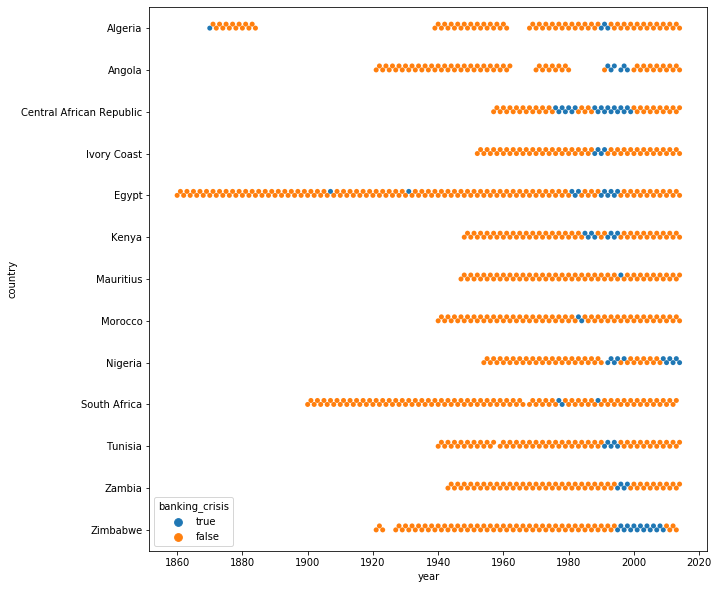

In [0]:
fig, ax = pyplot.subplots(figsize=(10,10))
sns.swarmplot(x="year", y="country",hue="banking_crisis",data=df,ax=ax)


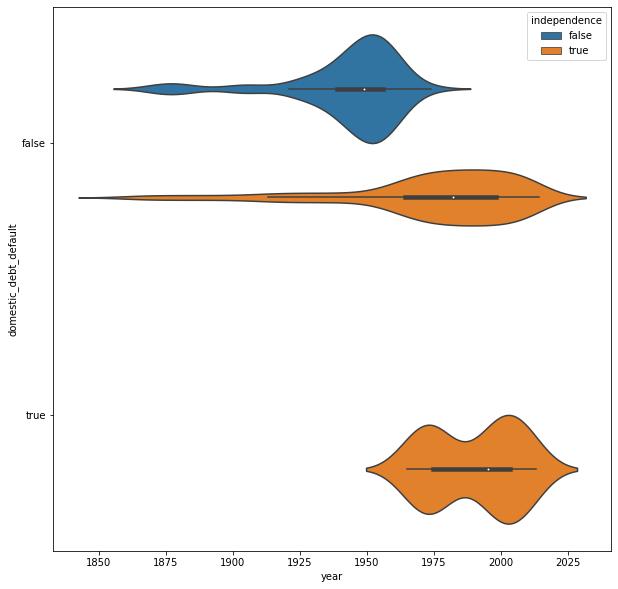

In [0]:
fig, ax = pyplot.subplots(figsize=(10,10))
sns.violinplot(x="year",y="domestic_debt_default",hue='independence',data=df,ax=ax)

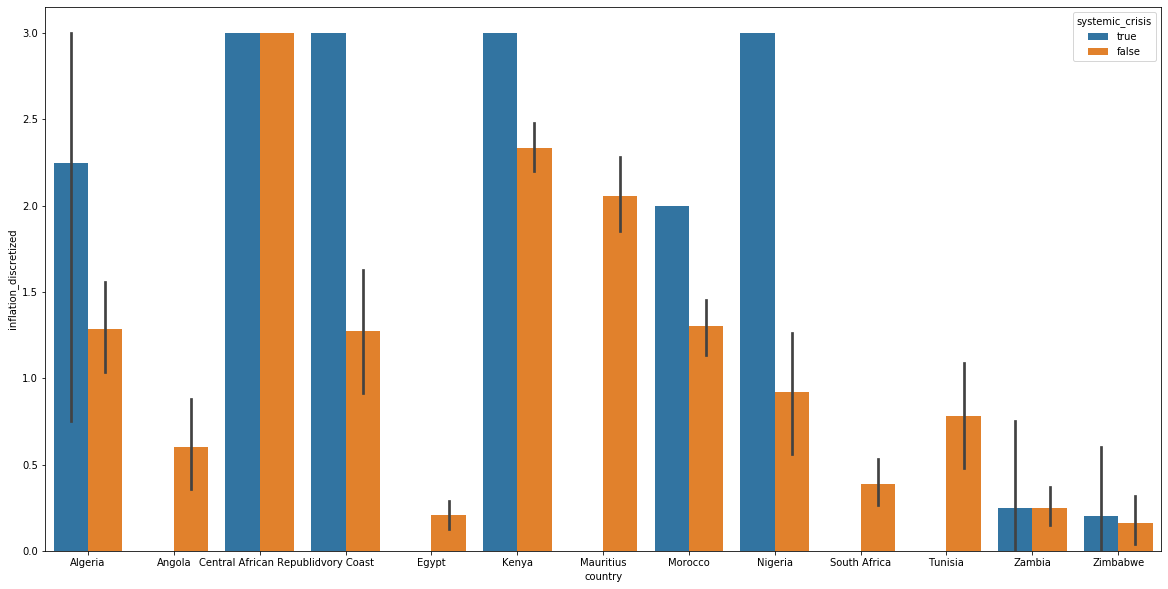

In [0]:
fig, ax = pyplot.subplots(figsize=(20,10))
sns.barplot(x="country", y="inflation_discretized",hue="systemic_crisis", data=df)

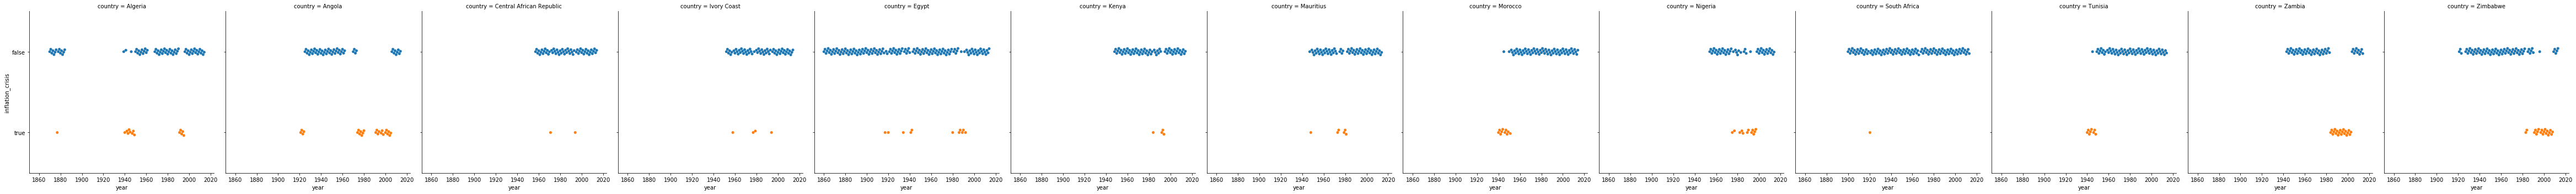

In [0]:
sns.catplot(x="year", y="inflation_crisis",col="country",kind='swarm', data=df)

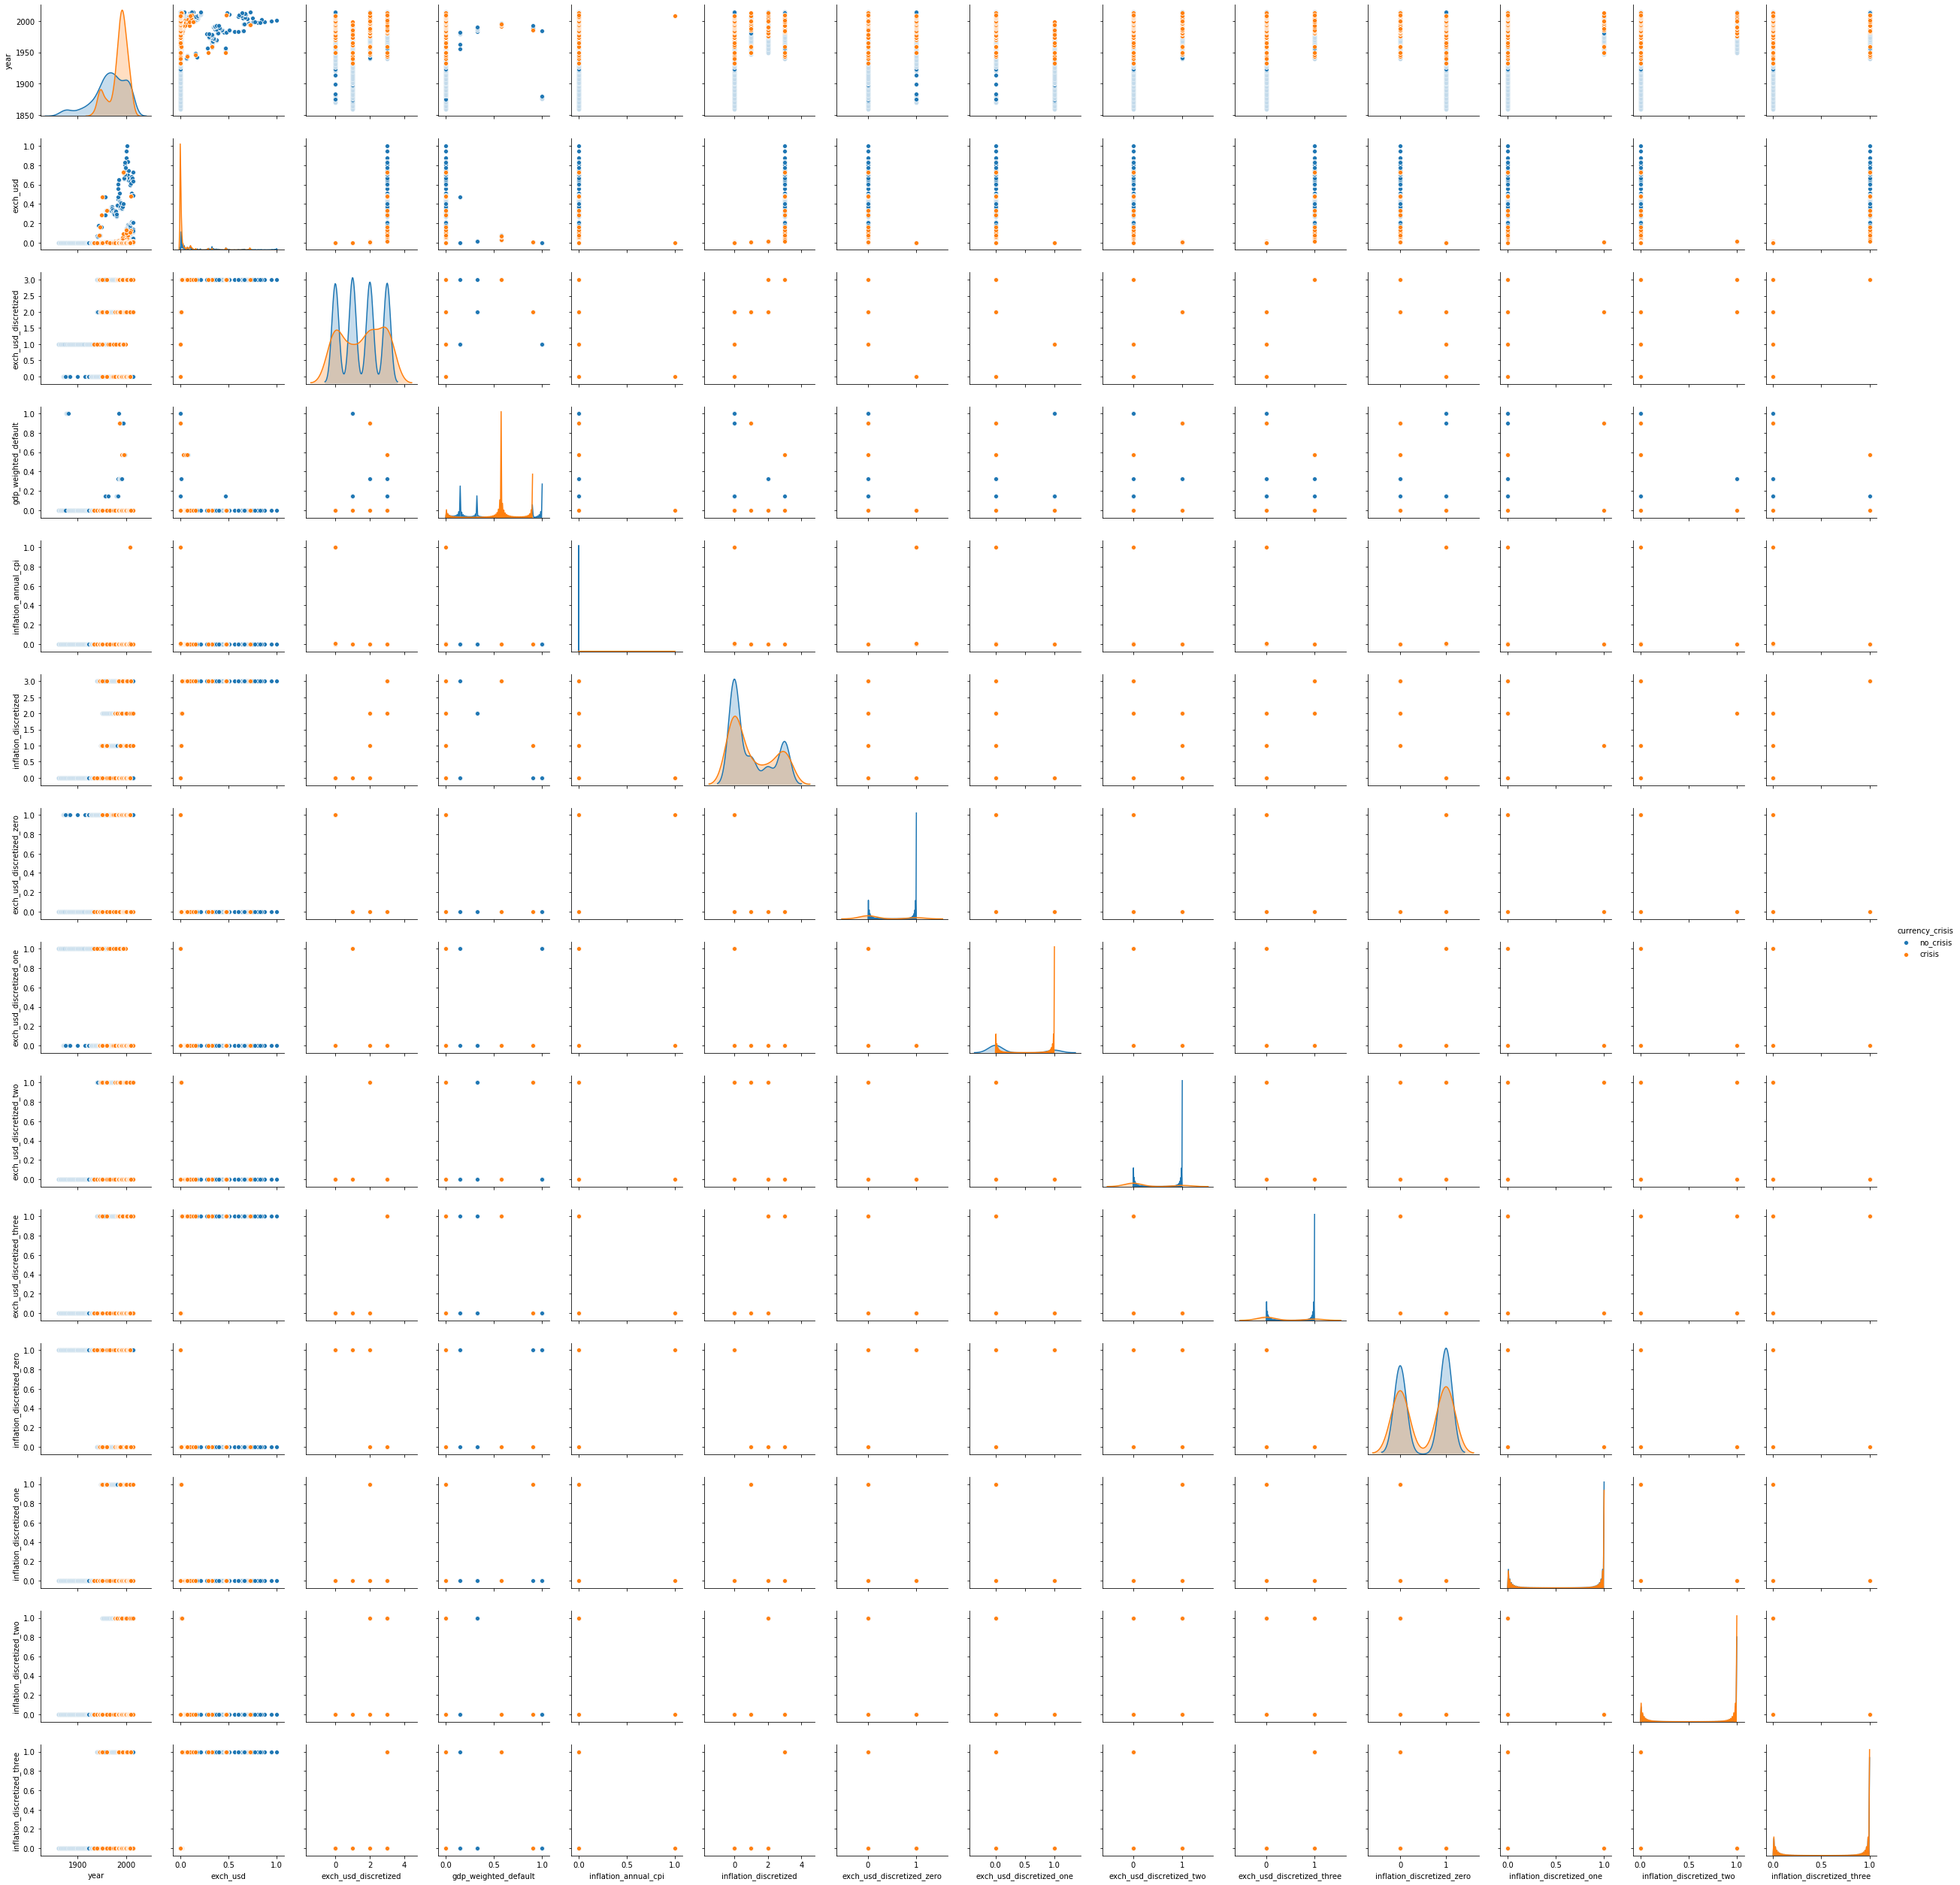

In [0]:
sns.pairplot(df,hue="currency_crisis")